<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Search Algorithms**
---


In [1]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10401436, Rafael de Souza Oliveira Cerqueira Tinôco' #@param {type:"string"}
Aluno2 = 'None' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Resumo**

Nesse trabalho foi feito a criação do Grafo das Cidades. As cidades escolhidas foram Campinas, Rio de Janeiro, Belo Horizonte, São Paulo, São José dos Campos, Taubaté, Resende, Volta Redonda, Vitória, Ibirité, Ribeirão Preto e Santos. Distâncias reais entre as cidades. O grafo foi formulado utilizando networkx e matplotlib, juntamente com o conhecimento de repositórios e vídeos sobre as bibliotecas.

Decidi que utilizarei Dijkstra na entrega final.

# **Implementação**

*Aqui o código da sua solução. Você deve explicar em linhas gerais o código. Para isso você pode quebrar o código em algumas partes e incluir células de texto explicativos. Não empregue para isso comentários no corpo do código, mas crie células de texto do notebook.*

> ***ATENÇÃO: O código deve ser 100% executável no Colab e, portanto, não devem ser empregados arquivos locais (da sua máquina) e, se necessário, devem ser incluídos o install de novas bibliotecas empregadas.***



## **1. Grafo das cidades (2,0)**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def criar_e_desenhar_grafo():
    G = nx.Graph()

    nodes = ["Campinas", "Rio de Janeiro", "Belo Horizonte", "São Paulo", "São José dos Campos",
             "Taubaté", "Resende", "Volta Redonda", "Vitória", "Ibirité", "Ribeirão Preto", "Santos"]
    G.add_nodes_from(nodes)

    edges = [("São Paulo", "Campinas", 100), ("São Paulo", "São José dos Campos", 90),
             ("São Paulo", "Santos", 80), ("Campinas", "Ribeirão Preto", 220),
             ("São José dos Campos", "Taubaté", 40), ("Taubaté", "Resende", 120),
             ("Resende", "Volta Redonda", 50), ("Volta Redonda", "Rio de Janeiro", 130),
             ("Rio de Janeiro", "Vitória", 520), ("Vitória", "Belo Horizonte", 540),
             ("Belo Horizonte", "Ibirité", 20), ("Belo Horizonte", "Vitória", 540),
             ("São Paulo", "Belo Horizonte", 586)]
    G.add_weighted_edges_from(edges)

    pos = nx.bfs_layout(G, "São Paulo", align="horizontal")
    nx.draw(G, pos, with_labels=True, node_size=1300, node_color="skyblue", font_size=10)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title("Grafo das Cidades")
    plt.show()

    return G

Primeiro, é importada as bibliotecas NetworkX e Matplotlib para manipular e desenhar o gráfico. Em seguida, definimos uma função "criar_e_desenhar_grafo" que cria um grafo, adiciona nós (cidades) e arestas (estradas com distâncias). Usamos o layout "bfs_layout" para organizar o grafo em um formato de árvore, facilitando a visualização de uma busca em largura (BFS). Finalmente, desenhamos o grafo com os nós e as arestas rotulados com as distâncias e exibimos o gráfico.

> ## **1.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

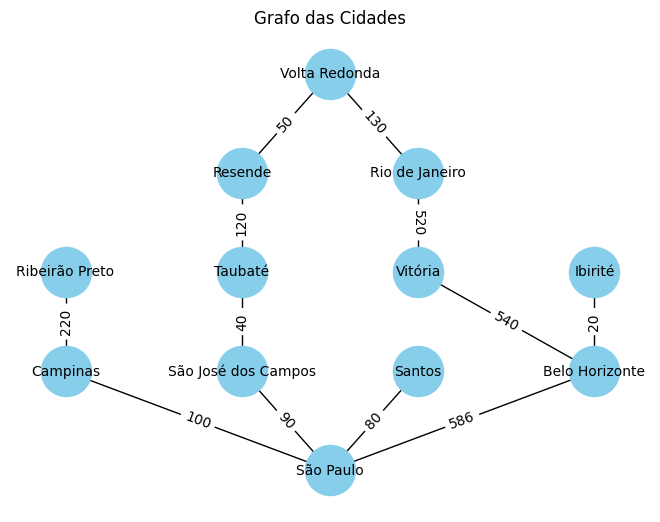

Graph with 12 nodes and 12 edges


In [ ]:
G = criar_e_desenhar_grafo()
print(G)

## **2. BFS, Breadth-First Search(2,0)**

In [ ]:
def bfs(grafo, start_node):
    visited = set()
    queue = [start_node]
    bfs_order = []

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.add(node)
            bfs_order.append(node)
            neighbors = list(grafo.neighbors(node))
            queue.extend(neighbors)

    return bfs_order

> ## **2.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [ ]:
start_node = "Rio de Janeiro"
bfs_result = bfs(G, start_node)
print("Ordem de visitação BFS:", bfs_result)

Ordem de visitação BFS: ['Rio de Janeiro', 'Volta Redonda', 'Vitória', 'Resende', 'Belo Horizonte', 'Taubaté', 'Ibirité', 'São Paulo', 'São José dos Campos', 'Campinas', 'Santos', 'Ribeirão Preto']


## **3. Busca Informada (5,0)**

*Indique aqui em um texto o algoritmo de Busca Informada escolhido e o motivo da escolha.*

In [ ]:
def dijkstra(grafo, start_node):
    distances = {node: float('infinity') for node in grafo.nodes}
    distances[start_node] = 0

    priority_queue = [(0, start_node)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, attributes in grafo[current_node].items():
            weight = attributes['weight']
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

> ## **3.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [ ]:
start_node = "São Paulo"
distances = dijkstra(G, start_node)
print(f"Distâncias mais curtas de {start_node}: {distances}")

Distâncias mais curtas de São Paulo: {'Campinas': 100, 'Rio de Janeiro': 430, 'Belo Horizonte': 586, 'São Paulo': 0, 'São José dos Campos': 90, 'Taubaté': 130, 'Resende': 250, 'Volta Redonda': 300, 'Vitória': 950, 'Ibirité': 606, 'Ribeirão Preto': 320, 'Santos': 80}


# **Referências**

https://colab.research.google.com/github/Rogerio-mack/IA_2025S1/blob/main/Search_Algorithms.ipynb#scrollTo=1T0BjUBP3q0i

https://www.youtube.com/watch?v=flwcAf1_1RU

https://www.youtube.com/watch?v=HpFXKomhvag

https://www.youtube.com/watch?v=XENX8YdIox4

https://github.com/ciencia-de-dados-pratica/GEAM-basico/blob/master/2023/Jeferson%20Aires%20-%20Introdu%C3%A7%C3%A3o%20%C3%A0%20Grafos/Introdu%C3%A7%C3%A3o_%C3%A0_grafos_direcionados_com_NetworkX%20(2).ipynb

As distâncias entre as cidades foram medidas com a ajuda do Google Maps.

---

In [3]:
#@title **Avaliação**
Resumo = 8 #@param {type:"slider", min:0, max:10, step:1}

Grafo = 8 #@param {type:"slider", min:0, max:10, step:1}

BFS = 8 #@param {type:"slider", min:0, max:10, step:1}

Busca_Informada = 8 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 8 #@param {type:"slider", min:0, max:10, step:1}

Geral = 8 #@param {type:"slider", min:0, max:10, step:1}








In [4]:
#@title **Nota Final**

nota = Resumo + 2*Grafo + 3*BFS + 5*Busca_Informada + Referencias + Geral

nota = nota / 13

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 8.0



tia                                        nome  nota
0  10401436   RAFAEL DE SOUZA OLIVEIRA CERQUEIRA TINÔCO   8.0

Correto, mas nenhum comentário em qualquer etapa...